# Factor Analysis

In [1]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer, Rotator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Example 1

File germany.xlsx contains the results of a survey of German citizens about their attitude towards foreign workers.

Variables description:

    satisfaction - Satisfaction with one's own place in economic relations (yes, no, no answer(9))
    spa - Socio-Political Activities (yes, no, no answer(9))
    position - Position held (worker, officer, specialist, no answer(9))
    gender - Gender (male, female)

The following 15 variables are measured in a Likert scale from 1 to 7, where 1 is strongly disagree and 7 is strongly agree:

    a1    It is necessary to improve the integration of foreigners
    a2    You need to be more patient (tolerant) to refugees
    a3    Country's money should be spent on the country's needs
    a4    Germany - is not a social assistance service for the whole world
    a5    It is necessary to try to establish a good relationship with each other
    a6    The rights of refugees should be limited
    a7    The Germans would become a minority
    a8    The right of refugees to be protected in all of Europe
    a9    Hostility towards foreigners harms the German economy
    a10   First, we need to create normal living conditions for Germans
    a11   We are also foreigners in other countries
    a12   Multiculturalism means multikriminal
    a13   In the boat, there are no free places
    a14   Foreigners out
    a15   The integration of foreigners - the murder of the nation

In [3]:
df1 = pd.read_excel('germany.xlsx', index_col=0)
df1

,satisfaction,spa,position,gender,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
id,,,,,,,,,,,,,,,,,,,
1,9,no,officer,female,6,5,4,2,6,5,2,5,6,2,7,4,3,2,1
2,yes,9,officer,male,6,6,4,3,7,7,2,7,7,4,7,4,1,1,1
3,9,no,officer,male,5,7,7,6,6,6,6,5,5,7,5,4,7,4,1
4,yes,9,officer,female,7,6,3,2,7,7,2,5,2,1,2,1,1,1,1
5,yes,no,officer,female,7,5,5,2,7,2,2,6,7,1,7,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,9,yes,officer,female,6,6,5,3,6,5,2,6,4,3,4,3,3,1,1
87,yes,no,officer,male,7,7,4,1,7,6,1,7,7,5,7,1,2,1,1
88,9,no,officer,female,6,5,5,5,6,5,4,6,6,5,7,2,4,2,4


## Correlation matrix

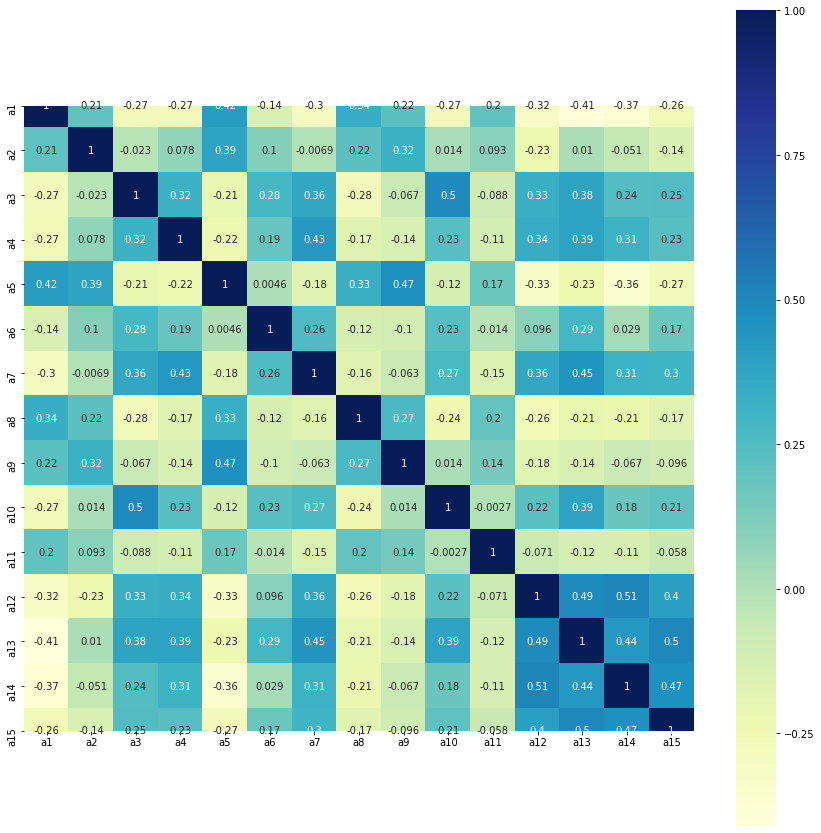

In [4]:
cor = df1.corr('kendall')
plt.figure(figsize=(15, 15))
sns.heatmap(cor, square = True, cmap='YlGnBu', annot=True)
plt.show()

In [5]:
df1_factors = df1[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15']]
#select only 15 variables for factor analysis

##  Data factorability analysis 

In [6]:
calculate_bartlett_sphericity(df1_factors) #Bartlett's test of Sphericity

(527.6167361042357, 1.4861791386880466e-57)

H0: variables are unrelated (correlation matrix is an identity matrix)

As p-value < 0.05, H0 is rejected, there are statistically significant correlations between the variables.

In [7]:
_, kmo_model = calculate_kmo(df1_factors)
kmo_model #KMO

0.7969021103103509

KMO=0.8, coefficient has a sufficiently high value, the data are acceptable for factor analysis

## Determining the number of factors

We specify varimax rotation which produces orthogonal factors. This means that factors are not correlated to each other. This setting is recommended when you want to identify variables to create indexes or new variables without inter-correlated components.

In [8]:
fa1 = FactorAnalyzer(n_factors=15, rotation='varimax', method='principal') 
#factor model for 15 factors, which corresponds to the total number of variables
fa1.fit(df1_factors)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=15, rotation='varimax',
               rotation_kwargs={}, svd_method='randomized', use_smc=True)

In [9]:
ev, v = fa1.get_eigenvalues()
ev #15 eigenvalues

array([5.14623928, 1.94544498, 1.41494146, 0.99011736, 0.93570522,
       0.76014747, 0.69335223, 0.61249812, 0.52938137, 0.47270815,
       0.43334977, 0.3393038 , 0.301026  , 0.24526248, 0.18052231])

In [10]:
5.14623928 + 1.94544498 + 1.41494146 + 0.99011736 + 0.93570522 + 0.76014747 + 0.69335223 + 0.61249812 + 0.52938137 + 0.47270815 + 0.43334977 + 0.3393038 + 0.301026 + 0.24526248 + 0.18052231

14.999999999999996

The sum of all eigenvalues is equal to the total number of variables.

In [11]:
ev[ev > 1]

array([5.14623928, 1.94544498, 1.41494146])

Kaiser criterion suggests to retain those factors with eigenvalues equal or higher than 1.

3 eigenvalues are greater than 1, so we will retain 3 factors.

In [12]:
df1_factors.shape

(90, 15)

## Scree Plot

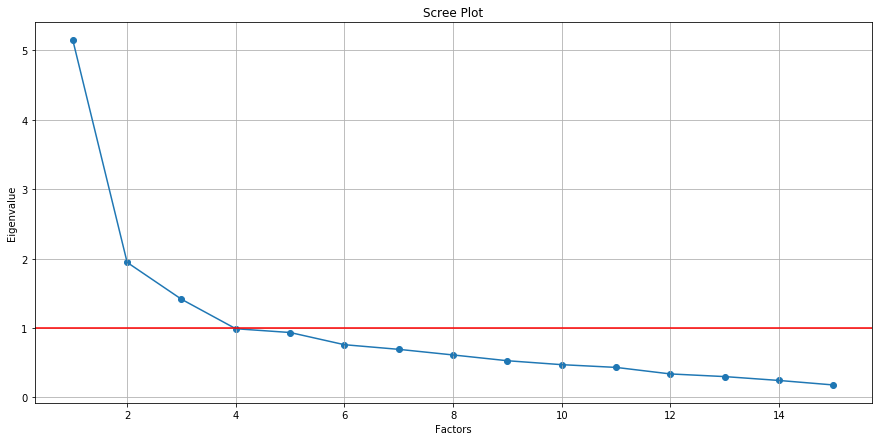

In [13]:
plt.figure(figsize=(15, 7))
plt.scatter(range(1, df1_factors.shape[1]+1), ev)
plt.plot(range(1, df1_factors.shape[1]+1), ev)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Final factor model

In [14]:
fa1 = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal') 
#factor model with 3 factors
fa1.fit(df1_factors)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='principal', n_factors=3, rotation='varimax',
               rotation_kwargs={}, svd_method='randomized', use_smc=True)

## Factor loading matrix

Factor loadings are the weights and correlations between each variable and the factor. The higher the load the more relevant is the variable in defining the factor’s dimensionality. A negative value indicates an inverse impact on the factor. 

In [15]:
fa1.loadings_

array([[-0.4660195 ,  0.62840439, -0.19060344],
       [-0.14074259,  0.65733793,  0.21500941],
       [ 0.32689706, -0.15250028,  0.71042853],
       [ 0.53360651, -0.1060822 ,  0.39339944],
       [-0.36183899,  0.78330249,  0.04515595],
       [-0.01174149, -0.03762635,  0.76311496],
       [ 0.52500263,  0.03583864,  0.54239357],
       [-0.11658338,  0.7194448 , -0.26680154],
       [ 0.02565252,  0.5506668 , -0.08862158],
       [ 0.25262386, -0.09500442,  0.68517122],
       [ 0.12459773,  0.39203217, -0.29191062],
       [ 0.80158222, -0.19894556,  0.10740204],
       [ 0.68533241, -0.10993066,  0.4650684 ],
       [ 0.83683986, -0.14401485, -0.02546363],
       [ 0.72505003, -0.04826561,  0.14394166]])

In [16]:
factors1 = pd.DataFrame(data=fa1.loadings_, 
                       index=df1_factors.columns, 
                       columns=['Factor_1', 'Factor_2', 'Factor_3'])
factors1

,Factor_1,Factor_2,Factor_3
a1,-0.466019,0.628404,-0.190603
a2,-0.140743,0.657338,0.215009
a3,0.326897,-0.152500,0.710429
a4,0.533607,-0.106082,0.393399
a5,-0.361839,0.783302,0.045156
a6,-0.011741,-0.037626,0.763115
a7,0.525003,0.035839,0.542394
a8,-0.116583,0.719445,-0.266802
a9,0.025653,0.550667,-0.088622
a10,0.252624,-0.095004,0.685171


In [17]:
factors1.index = ["It is necessary to improve the integration of foreigners",
"You need to be more patient (tolerant) to refugees",
"Country's money should be spent on the country's needs",
"Germany - is not a social assistance service for the whole world",
"It is necessary to try to establish a good relationship with each other",
"The rights of refugees should be limited",
"The Germans would become a minority",
"The right of refugees to be protected in all of Europe",
"Hostility towards foreigners harms the German economy",
"First, we need to create normal living conditions for Germans",
"We are also foreigners in other countries",
"Multiculturalism means multikriminal",
"In the boat, there are no free places",
"Foreigners out",
"The integration of foreigners - the murder of the nation"]

In [18]:
factors1

,Factor_1,Factor_2,Factor_3
It is necessary to improve the integration of foreigners,-0.466019,0.628404,-0.190603
You need to be more patient (tolerant) to refugees,-0.140743,0.657338,0.215009
Country's money should be spent on the country's needs,0.326897,-0.152500,0.710429
Germany - is not a social assistance service for the whole world,0.533607,-0.106082,0.393399
It is necessary to try to establish a good relationship with each other,-0.361839,0.783302,0.045156
The rights of refugees should be limited,-0.011741,-0.037626,0.763115
The Germans would become a minority,0.525003,0.035839,0.542394
The right of refugees to be protected in all of Europe,-0.116583,0.719445,-0.266802
Hostility towards foreigners harms the German economy,0.025653,0.550667,-0.088622
"First, we need to create normal living conditions for Germans",0.252624,-0.095004,0.685171


In [19]:
factors1.sort_values('Factor_1', ascending=False) #sort the matrix by the first column

,Factor_1,Factor_2,Factor_3
Foreigners out,0.836840,-0.144015,-0.025464
Multiculturalism means multikriminal,0.801582,-0.198946,0.107402
The integration of foreigners - the murder of the nation,0.725050,-0.048266,0.143942
"In the boat, there are no free places",0.685332,-0.109931,0.465068
Germany - is not a social assistance service for the whole world,0.533607,-0.106082,0.393399
The Germans would become a minority,0.525003,0.035839,0.542394
Country's money should be spent on the country's needs,0.326897,-0.152500,0.710429
"First, we need to create normal living conditions for Germans",0.252624,-0.095004,0.685171
We are also foreigners in other countries,0.124598,0.392032,-0.291911
Hostility towards foreigners harms the German economy,0.025653,0.550667,-0.088622


## Description of factors
TBC

## Communalities

Communality is the total amount of variance a variable shares with all factors (and, therefore, the amount it shares with all other variables in the factor analysis). It ranges between 0 and 1. Values closer to 1 suggest that extracted factors explain more of the variance of an individual variable. The communality is calculated as the sum of the squared component loadings.

In [20]:
fa1.get_communalities()

array([0.64839593, 0.49813068, 0.63482672, 0.45075246, 0.7465293 ,
       0.58389804, 0.57110296, 0.60237556, 0.31174576, 0.54230426,
       0.25442563, 0.69364859, 0.69805388, 0.72168963, 0.54874632])

In [21]:
communalities1 = pd.DataFrame(data=fa1.get_communalities(), 
                       index=df1_factors.columns, 
                       columns=['Communalities'])
communalities1.sort_values('Communalities') 

,Communalities
a11,0.254426
a9,0.311746
a4,0.450752
a2,0.498131
a10,0.542304
a15,0.548746
a7,0.571103
a6,0.583898
a8,0.602376
a3,0.634827


In [23]:
communalities1[communalities1.Communalities < 0.3]

,Communalities
a11,0.254426


The variable a11 "We are also foreigners in other countries" has low communality value, this variable did not fit well into the model.

## Percentage of variance in the original variables explained by the model

In [24]:
cumulative_variances = fa1.get_factor_variance()[2]
cumulative_variances

array([0.23113864, 0.40020808, 0.56710838])

In [25]:
factor_variance = pd.DataFrame(data=fa1.get_factor_variance()[1:3],
                              index=['Proportional variance', 'Cumulative variance'],
                              columns=factors1.columns)
factor_variance

,Factor_1,Factor_2,Factor_3
Proportional variance,0.231139,0.169069,0.166900
Cumulative variance,0.231139,0.400208,0.567108


Factor model with 3 factors explains 56.7% of the total variance of the original 15 variables. The 1st factor explains 23.1%, the second - 16.9%, and the third - 16.7%.

## Saving the factors as variables

In [26]:
transformed = pd.DataFrame(data=fa1.transform(df1_factors),
                           index=df1_factors.index,
                           columns=factors1.columns)
transformed

,Factor_1,Factor_2,Factor_3
id,,,
1,-0.059329,-0.199069,-1.256620
2,-0.488112,0.733340,-0.323988
3,0.778377,0.161844,1.221542
4,-2.015888,-0.969811,-0.068369
5,-0.625094,0.402360,-1.672749
...,...,...,...
86,-0.847144,-0.507923,-0.251960
87,-1.060511,0.975685,-0.225030
88,0.416450,0.343015,-0.264737


In [27]:
df1 = pd.concat([df1, transformed], axis=1)
df1

,satisfaction,spa,position,gender,a1,a2,a3,a4,a5,a6,...,a9,a10,a11,a12,a13,a14,a15,Factor_1,Factor_2,Factor_3
id,,,,,,,,,,,,,,,,,,,,,
1,9,no,officer,female,6,5,4,2,6,5,...,6,2,7,4,3,2,1,-0.059329,-0.199069,-1.256620
2,yes,9,officer,male,6,6,4,3,7,7,...,7,4,7,4,1,1,1,-0.488112,0.733340,-0.323988
3,9,no,officer,male,5,7,7,6,6,6,...,5,7,5,4,7,4,1,0.778377,0.161844,1.221542
4,yes,9,officer,female,7,6,3,2,7,7,...,2,1,2,1,1,1,1,-2.015888,-0.969811,-0.068369
5,yes,no,officer,female,7,5,5,2,7,2,...,7,1,7,1,1,1,1,-0.625094,0.402360,-1.672749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,9,yes,officer,female,6,6,5,3,6,5,...,4,3,4,3,3,1,1,-0.847144,-0.507923,-0.251960
87,yes,no,officer,male,7,7,4,1,7,6,...,7,5,7,1,2,1,1,-1.060511,0.975685,-0.225030
88,9,no,officer,female,6,5,5,5,6,5,...,6,5,7,2,4,2,4,0.416450,0.343015,-0.264737


# Example 2

File SAQ.xlsx contains the results of a survey of American students studying the course "Data Analysis in SPSS".

Variables are measured in a Likert scale from 1 to 5:

    1 - Strongly Agree
    2 - Agree 
    3 - Neither
    4 - Disagree
    5 - Strongly Disagree

Variables description:

    q01 - Statistics makes me cry
    q02 - My friends will think I'm stupid for not being able to cope with SPSS
    q03 - Standard deviations excite me
    q04 - I dream that Pearson is attacking me with correlation coefficients
    q05 - I don't understand statistics
    q06 - I have little experience of computers
    q07 - All computers hate me
    q08 - I have never been good at mathematics
    q09 - My friends are better at statistics than me
    q10 - Computers are useful only for playing games
    q11 - I did badly at mathematics at school
    q12 - People try to tell you that SPSS makes statistics easier to understand but it doesn't
    q13 - I worry that I will cause irreparable damage because of my incompetence with computers
    q14 - Computers have minds of their own and deliberately go wrong whenever I use them
    q15 - Computers are out to get me
    q16 - I weep openly at the mention of central tendency
    q17 - I slip into a coma whenever I see an equation
    q18 - SPSS always crashes when I try to use it
    q19 - Everybody looks at me when I use SPSS
    q20 - I can't sleep for thoughts of eigenvectors
    q21 - I wake up under my duvet thinking that I am trapped under a normal distribution
    q22 - My friends are better at SPSS than I am
    q23 - If I'm good at statistics my friends will think I'm a nerd

["Statistics makes me cry",
"My friends will think I'm stupid for not being able to cope with SPSS",
"Standard deviations excite me",
"I dream that Pearson is attacking me with correlation coefficients",
"I don't understand statistics",
"I have little experience of computers",
"All computers hate me",
"I have never been good at mathematics",
"My friends are better at statistics than me",
"Computers are useful only for playing games",
"I did badly at mathematics at school",
"People try to tell you that SPSS makes statistics easier to understand but it doesn't",
"I worry that I will cause irreparable damage because of my incompetence with computers",
"Computers have minds of their own and deliberately go wrong whenever I use them",
"Computers are out to get me",
"I weep openly at the mention of central tendency",
"I slip into a coma whenever I see an equation",
"SPSS always crashes when I try to use it",
"Everybody looks at me when I use SPSS",
"I can't sleep for thoughts of eigenvectors",
"I wake up under my duvet thinking that I am trapped under a normal distribution",
"My friends are better at SPSS than I am",
"If I'm good at statistics my friends will think I'm a nerd"]